# **Logistic Regression** - Classification Model

## Binary Classification

#### basic imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder

## **tumors dataset: from [madewithML](https://madewithml.com)**

```
@article{madewithml,
    author       = {Goku Mohandas},
    title        = { Logistic regression - Made With ML },
    howpublished = {\url{https://madewithml.com/}},
    year         = {2021}
}
```




In [2]:
# Read from CSV to Pandas DataFrame
url = "https://raw.githubusercontent.com/GokuMohandas/MadeWithML/main/datasets/tumors.csv"
df = pd.read_csv(url, header=0) # load
df = df.sample(frac=1).reset_index(drop=True) # shuffle
df.head()

,leukocyte_count,blood_pressure,tumor_class
0,18.653399,15.622080,benign
1,12.878292,15.602327,malignant
2,9.628505,14.913433,malignant
3,16.580394,16.079513,benign
4,20.110878,15.419251,benign


In [3]:
# DATA

X = df[['leukocyte_count', 'blood_pressure']].values
y = df['tumor_class'].values
y.shape

(1000,)

#### data visualization

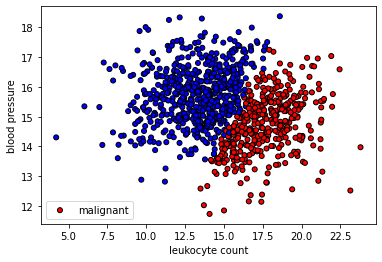

In [4]:
colors = {"benign": "red", "malignant": "blue"}
plt.scatter(X[:, 0], X[:, 1], c=[colors[_y] for _y in y], s=25, edgecolors="k")
plt.xlabel("leukocyte count")
plt.ylabel("blood pressure")
plt.legend(["malignant", "benign"], loc="lower left")
plt.show()

#### label encoding

In [5]:
lenc = LabelEncoder()
lenc.fit(y)
# benign: 0, malignant: 1
y = lenc.transform(y)

### **MODEL**

`logistic_regression.py` in current dir

In [27]:
class LogisticRegression:
    def __init__(self, learning_rate=1e-2, epochs=10000) -> None:
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.decision_boundary = 0.5

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def y_pred(self, X, w, b):

        # X : m X n
        # w : n X 1
        # X.w + b: m X 1
        # y_pred: m X 1

        return self.sigmoid(np.dot(X, w) + b)

    def cost(self, y_pred, y):

        # y_pred: m X 1
        # y: m X 1
        # cost: scalar

        # * : element-wise matrix multiplication

        positive_side = y * np.log(y_pred)
        negative_side = (1 - y) * np.log(1 - y_pred)

        return (-1 / self.m) * np.sum(positive_side + negative_side)

    def gradient_descent(self, X, y, y_pred, w, b):

        # X: m X n
        # X.T: n X m
        # y or y_pred: m X 1
        # X.T dot (y_pred-y) = n X 1 == W.shape : n X 1
        # b: scalar

        dW = (1 / self.m) * np.dot(X.T, (y_pred - y))
        db = (1 / self.m) * np.sum(y_pred - y)

        w -= self.learning_rate * dW
        b -= self.learning_rate * db

        return w, b

    def fit(self, X, y):

        # X: m X n
        # y: m X 1

        # m: no. of samples
        # n: no. of features
        self.m, self.n = X.shape

        # weights: n X 1
        # bias: scalar

        self.weights = np.zeros(shape=self.n)
        self.bias = 0

        for _ in range(self.epochs):

            y_pred = self.y_pred(X, self.weights, self.bias)
            self.weights, self.bias = self.gradient_descent(
                X, y, y_pred, self.weights, self.bias
            )
            cost = self.cost(y_pred, y)

            self.loss = cost

    def predict(self, X):

        y_pred = self.y_pred(X, self.weights, self.bias)
        y_pred_labels = y_pred >= self.decision_boundary
        y_pred_labels = y_pred_labels.astype(int)

        return y_pred_labels


In [91]:
classifier = LogisticRegression(epochs = 1000)

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1234)

In [93]:
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

sm_mse = mean_squared_error(y_test, y_pred)
sm_mae = mean_absolute_error(y_test, y_pred)

print(sm_mse, sm_mae)

print(list(zip(y_pred, y_test)))

print(classifier.loss)

print(f"Accuracy: {np.sum(y_test==y_pred)/X_test.shape[0]}")

0.015 0.015
[(1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1,

https://stackoverflow.com/questions/38125319/python-divide-by-zero-encountered-in-log-logistic-regression

#### visualization of predictions

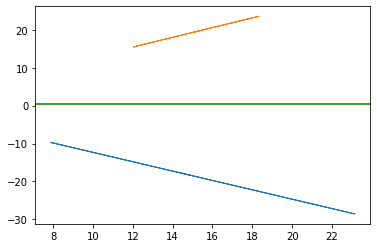

In [94]:
plt.plot(X_test, X_test * classifier.weights + classifier.bias, linewidth=1)
plt.axhline(classifier.decision_boundary, color="green")
plt.show()